In [ ]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

In [17]:
df = pd.read_parquet('./data/yellow_tripdata_2023-01.parquet')


Q1: Read the data for January. How many columns are there?

In [21]:
len(df.columns)

19

Q2: What's the standard deviation of the trips duration in January?

In [24]:
df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

In [25]:
df.duration.std()

42.59435124195458

Q3: What fraction are left after dropping outliers (only keep rows with duration between 1 and 60 mins)

In [26]:
n_before = len(df)
df = df[(df.duration >= 1) & (df.duration <= 60)]
n_after = len(df)

print(n_after/n_before)

0.9812202822125979


Q4: What's the dimensionality of the feature matrix?

In [27]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)

/tmp/ipykernel_126478/138176157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical] = df[categorical].astype(str)


In [30]:
train_dicts = df[categorical].to_dict(orient='records')

dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)


In [35]:
X_train

<3009173x515 sparse matrix of type '<class 'numpy.float64'>'
	with 6018346 stored elements in Compressed Sparse Row format>

Q5: Train a linear regression model with default parameters - What's the RMSE on train?

In [36]:

target = 'duration'
y_train = df[target].values


In [37]:

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [40]:

y_pred = lr.predict(X_train)

mean_squared_error(y_train, y_pred, squared=False)

/home/mpierrau/.cache/pypoetry/virtualenvs/mlops-zoomcamp-2024-mpierrau-jQelxcs6-py3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.649261936284003

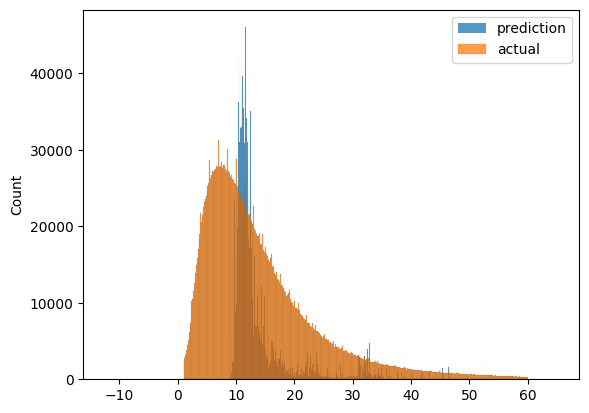

In [41]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='actual')

plt.legend()

Q6: What's the RMSE on validation?

In [47]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime)
        df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [48]:
df_val = read_dataframe('./data/yellow_tripdata_2023-02.parquet')

In [50]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [51]:
target = 'duration'
y_val = df_val[target].values

In [52]:
y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

/home/mpierrau/.cache/pypoetry/virtualenvs/mlops-zoomcamp-2024-mpierrau-jQelxcs6-py3.11/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.811818654341152